# Process NHL Player College 

Data cleaning process largely follows

* NHL player-level statistics from processed table using API using this repository's code
* NHL-college player records are from [College Hockey Inc.](https://collegehockeyinc.com/2021-22-alums-nhl.php). Rotate out the URL years to get historical records.

![this process](diagram_headline.png)

Not all college players are accounted for, who maybe reserve players or data not able to be matched. At the time of the initial analysis 1/26/2024, the match rate is about $\frac{2,119}{3,438}\approx 61.6\%$

In [1]:
import pandas as pd
import numpy as np
import os
import glob
import json

import matplotlib.pyplot as plt

cwd = os.getcwd()
cwd_git = os.path.dirname(os.path.dirname(os.path.dirname(cwd)))

# Location of the data
#   It will be your data location
with open(cwd_git + "/credentials.json") as f:
    loc = json.load(f)
# Replace with where you collect all data
cwd_data = loc["credentials"]["server"]
cwd_data_college = cwd_data + "nhl/data_playercollege"


/tmp/ipykernel_13473/2240188138.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
%run -i 'player_college_matching.py'

/home/jj/Documents/github/NHL-Analytics/src/data/playerCollege/player_college_matching.py:46: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  tempdf = pd.read_csv(iter)
/home/jj/.local/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
dfin

nationality draft  \
id_player fullName         season team_triCode                     
8464989.0 Matt Cullen      2018   MIN                   US   2nd   
                           2019   PIT                   US   2nd   
8467407.0 Brian Gionta     2018   BOS                   US   3rd   
8468011.0 Ryan Miller      2018   ANA                   US   5th   
                           2019   ANA                   US   5th   
...                                                    ...   ...   
8483575.0 Matt Murray      2023   DAL               Canada    FA   
8484125.0 Hunter McKown    2023   CBJ                   US    FA   
8484254.0 Akito Hirose     2023   VAN               Canada    FA   
8484256.0 Jake Livingstone 2023   NSH               Canada    FA   
8484287.0 Cole McWard      2023   VAN                   US    FA   

                                                         college  college_yrs  \
id_player fullName         season team_triCode                                  
8464989.0 Matt Cullen      2018   MIN            St. Cloud State            2   
                           2019   PIT            St. Cloud State            2   
8467407.0 Brian Gionta     2018   BOS             Boston College            4   
8468011.0 Ryan Miller      2018   ANA             Michigan State            3   
                           2019   ANA             Michigan State            3   
...                                                          ...          ...   
8483575.0 Matt Murray      2023   DAL              Massachusetts            5   
8484125.0 Hunter McKown    2023   CBJ           Colorado College            3   
8484254.0 Akito Hirose     2023   VAN            Minnesota State            3   
8484256.0 Jake Livingstone 2023   NSH            Minnesota State            3   
8484287.0 Cole McWard      2023   VAN                 Ohio State            2   

                                               position rookie  games  \
id_player fullName         season team_triCode                          
8464989.0 Matt Cullen      2018   MIN                 C  False     79   
                           2019   PIT                 C  False     46   
8467407.0 Brian Gionta     2018   BOS                RW  False     22   
8468011.0 Ryan Miller      2018   ANA                 G  False     28   
                           2019   ANA                 G  False     14   
...                                                 ...    ...    ...   
8483575.0 Matt Murray      2023   DAL                 G   True      3   
8484125.0 Hunter McKown    2023   CBJ                 C   True     12   
8484254.0 Akito Hirose     2023   VAN                 D   True      8   
8484256.0 Jake Livingstone 2023   NSH                 D   True      9   
8484287.0 Cole McWard      2023   VAN                 D   True      5   

                                                  gamemin  plusminus  goals  \
id_player fullName         season team_triCode                                
8464989.0 Matt Cullen      2018   MIN           11.800000        1.0   11.0   
                           2019   PIT           11.308333       12.0    3.0   
8467407.0 Brian Gionta     2018   BOS           13.300000       -1.0    2.0   
8468011.0 Ryan Miller      2018   ANA           58.775000        0.0    0.0   
                           2019   ANA           59.133333        0.0    0.0   
...                                                   ...        ...    ...   
8483575.0 Matt Murray      2023   DAL           59.316667        0.0    0.0   
8484125.0 Hunter McKown    2023   CBJ           11.883333       -4.0    0.0   
8484254.0 Akito Hirose     2023   VAN           16.758333       -1.0    0.0   
8484256.0 Jake Livingstone 2023   NSH           14.833333       -2.0    0.0   
8484287.0 Cole McWard      2023   VAN           14.533333        0.0    1.0   

                                                ...  assists  \
id_player fullName         season team_triCode  ...            
84

In [ ]:
# Match with team performance of each season to see if the indication
#   WOuld match with playoff performance as well (to see if they made playoff)

ONCE I am done with other analyses

In [11]:
dfin.loc[dfin.rookie==True, :]

nationality draft  \
id_player fullName         season team_triCode                     
8475324.0 Nick Jensen      2017   DET                   US   5th   
8475718.0 Justin Holl      2018   TOR                   US   2nd   
8475730.0 Stephen Johns    2016   DAL                   US   2nd   
                           2017   DAL                   US   2nd   
8475736.0 Connor Brickley  2018   FLA                   US   2nd   
...                                                    ...   ...   
8483575.0 Matt Murray      2023   DAL               Canada    FA   
8484125.0 Hunter McKown    2023   CBJ                   US    FA   
8484254.0 Akito Hirose     2023   VAN               Canada    FA   
8484256.0 Jake Livingstone 2023   NSH               Canada    FA   
8484287.0 Cole McWard      2023   VAN                   US    FA   

                                                         college  college_yrs  \
id_player fullName         season team_triCode                                  
8475324.0 Nick Jensen      2017   DET            St. Cloud State            3   
8475718.0 Justin Holl      2018   TOR                  Minnesota            4   
8475730.0 Stephen Johns    2016   DAL                 Notre Dame            4   
                           2017   DAL                 Notre Dame            4   
8475736.0 Connor Brickley  2018   FLA                    Vermont            4   
...                                                          ...          ...   
8483575.0 Matt Murray      2023   DAL              Massachusetts            5   
8484125.0 Hunter McKown    2023   CBJ           Colorado College            3   
8484254.0 Akito Hirose     2023   VAN            Minnesota State            3   
8484256.0 Jake Livingstone 2023   NSH            Minnesota State            3   
8484287.0 Cole McWard      2023   VAN                 Ohio State            2   

                                               position rookie  games  \
id_player fullName         season team_triCode                          
8475324.0 Nick Jensen      2017   DET                 D   True     50   
8475718.0 Justin Holl      2018   TOR                 D   True      2   
8475730.0 Stephen Johns    2016   DAL                 D   True     13   
                           2017   DAL                 D   True     81   
8475736.0 Connor Brickley  2018   FLA                 C   True     79   
...                                                 ...    ...    ...   
8483575.0 Matt Murray      2023   DAL                 G   True      3   
8484125.0 Hunter McKown    2023   CBJ                 C   True     12   
8484254.0 Akito Hirose     2023   VAN                 D   True      8   
8484256.0 Jake Livingstone 2023   NSH                 D   True      9   
8484287.0 Cole McWard      2023   VAN                 D   True      5   

                                                  gamemin  plusminus  goals  \
id_player fullName         season team_triCode                                
8475324.0 Nick Jensen      2017   DET           17.541667       -7.0    4.0   
8475718.0 Justin Holl      2018   TOR           17.358333        5.0    2.0   
8475730.0 Stephen Johns    2016   DAL           17.450000       -5.0    1.0   
                           2017   DAL           17.816667      -10.0    4.0   
8475736.0 Connor Brickley  2018   FLA            7.150000       -7.0    3.0   
...                                                   ...        ...    ...   
8483575.0 Matt Murray      2023   DAL           59.316667        0.0    0.0   
8484125.0 Hunter McKown    2023   CBJ           11.883333       -4.0    0.0   
8484254.0 Akito Hirose     2023   VAN           16.758333       -1.0    0.0   
8484256.0 Jake Livingstone 2023   NSH           14.833333       -2.0    0.0   
8484287.0 Cole McWard      2023   VAN           14.533333        0.0    1.0   

                                                ...  assists  \
id_player fullName         season team_triCode  ...            
84

# Analysis

In [ ]:
# Top 10 production college? need college column

In [ ]:
# TIme on ice contribution: not just filling up the hours

In [ ]:
# Draft ranking, tenure, and production relationship

# Success and tenure of of higher/lower drafted college players

In [ ]:
# College tenure matters? 

# insight: more you spend in college, more likley you are 
#   (1) drafted by team ith less need, and (2) needing production before jumping to pro

In [ ]:
# PRoduction growth? or contributing right away? goal scoring and tings

# THis heavily depended on hihgly-thouted players and their production

In [ ]:
# Rookie season performance

# COmpare with other player's rookie season?

In [ ]:
# Calculate debut year and estimate the tenure for each rookie year cohorts

# COmpare to the other players cohort

<BarContainer object of 11 artists>

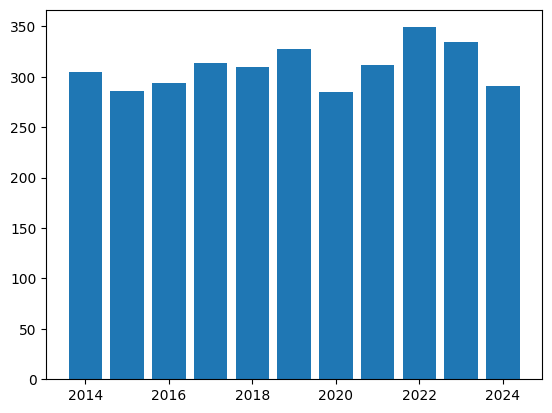

In [40]:
count_total = df.groupby(["season"]).name_last.count()
plt.bar(count_total.index, count_total)

In [22]:
pd.read_excel(iter)

,LAST NAME,FIRST NAME,COLLEGE,NHL TEAM,COUNTRY,POS.,DRAFT,YEARS IN COLLEGE,Season_end
0,Bonino,Nick,BU,ANA,US,F,6th,3,2014
1,Cogliano,Andrew,Michigan,ANA,Canada,F,1st,2,2014
2,Lovejoy,Ben,Dartmouth,ANA,US,D,FA,4,2014
3,Palmieri,Kyle,N. Dame,ANA,US,F,1st,1,2014
4,Steckel,David,OSU,ANA,US,F,1st,4,2014
...,...,...,...,...,...,...,...,...,...
300,Stoa,Ryan,Minn.,WSH,US,F,2nd,4,2014
301,Strachan,Tyson,OSU,WSH,Canada,D,5th,4,2014
302,Volpatti,Aaron,Brown,WSH,Canada,F,FA,4,2014
303,Wellman,Casey,UMass,WSH,US,F,FA,2,2014


,Last Name,First Name,NCAA Team,NHL Team,Pos.,Nationality,Draft,Years in College,Season_end
0,Grant,Derek,Michigan State,ANA,F,Canada,4th,2,2023
1,Helleson,Drew,Boston College,ANA,D,US,2nd,3,2023
2,LaCombe,Jackson,Minnesota,ANA,D,US,2nd,4,2023
3,Megna,Jayson,Omaha,ANA / COL,F,US,FA,1,2023
4,Nesterenko,Nikita,Boston College,ANA,F,US,6th,3,2023
...,...,...,...,...,...,...,...,...,...
329,Oshie,T.J.,North Dakota,WSH,F,US,1st,3,2023
330,Sheary,Conor,Massachusetts,WSH,F,US,FA,4,2023
331,Smith,Craig,Wisconsin,WSH / BOS,F,US,4th,2,2023
332,Snively,Joe,Yale,WSH,F,US,FA,4,2023
